# Aesthetics and Hashtag Modelling #

###### Tofunmi Christabel Elulade, student id: 22009789 ######



The aim of this project is to perform topic modelling processes on the descriptions and associated hashtags of images based on different aesthetics to discuss similarities and connections. This can serve as a sort of foundation for an image classification model that can output different images according to user prompts.

In [ ]:
## This is the install cell, in case there are any libraries not already installed are required for the project ##

In [1]:
## This will be the import cell, where all libraries needed for the project will be imported ##
# This is mainly for the sake of referencing #

import numpy as np
import pandas as pd 
import re
from sklearn.feature_extraction import _stop_words as stop_words 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction import _stop_words
stemmer = PorterStemmer()
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from IPython.display import display, Image as Img
from PIL import Image
import urllib.request

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tcelu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Step 1: Load and Prepare Data

First order of business is to load the dataset into the notebook. Although an numpy.array method could have worked, in this case I have decided to use a panda dataframe to load the data. Although the formatting is quite appealling, the main reason for this decision is to ensure that the last column (the hashtags) are loaded in properly. I had used the numpy.array method before but I discovered that the last column came out empty for each row (which was not ideal considering that the analysis needed the hashtags).

In [2]:
## Load dataset into notebook for analysis ##

file = open('data/Aesthetics_imgs.csv',"r",encoding="utf-8")
dataset = pd.read_csv('data/Aesthetics_imgs.csv', sep = ',')
print(dataset.shape)

(500, 3)


Check that the dataset is loaded properly, such that all the relevant data is kept.

In [3]:
dataset

Photo URL Aesthetic Type  \
0    https://64.media.tumblr.com/509fbf8bc7a57c09f9...    cottagecore   
1    https://64.media.tumblr.com/3898c9763352700539...    cottagecore   
2    https://64.media.tumblr.com/2bfba728993ba423c0...    cottagecore   
3    https://64.media.tumblr.com/b2355fe4ebcc1ac8de...    cottagecore   
4    https://64.media.tumblr.com/0a828e4d57a651898d...    cottagecore   
..                                                 ...            ...   
495  https://64.media.tumblr.com/4964d28cf5915c0c4a...            90s   
496  https://64.media.tumblr.com/d3e878b67241b25ccc...            90s   
497  https://64.media.tumblr.com/48858be10ec1d92b0b...            90s   
498  https://64.media.tumblr.com/0cac7d190944db7424...            90s   
499  https://64.media.tumblr.com/8ed4a1e2e3645f2e50...            90s   

                              Descriptions and hashtag  
0    #cottagecore #light academia #romantic academi...  
1    #nature #art #illustration #design #fashion #b...  
2    #autumn colors #Autumn forest #autumn aestheti...  
3    #flowercore #green witch #witchblr #artblr #co...  
4    #soft cottagecore vibes <3 #cottagecore #flowe...  
..                                                 ...  
495  #lucy liu#charlie's angels#angelcore#y2k angel...  
496  #drew barrymore#90s#1990s#scream series#charli...  
497  #yoshitomo nara#nara yoshitomo#aesthetic#gruge...  
498  #nintendo#super nintendo#famicom#retro tv#crt ...  
499  #spice girls#nineties#90s#1990s#90s aesthetic#...  

[500 rows x 3 columns]

It is best to start of by splitting the dataframe by rows so that each aesthetic can be contained in their seperate dataframes. This makes it easier to perform the tokenization process on each aesthetic than all at once - this will also allow us to make some interesting comparisons.

In [4]:
## Seperate rows of the dataset into the seperate aesthetics for topic modelling ##

cottagecore_data = dataset[1:50]
grunge_data = dataset[51:101]
old_money_data = dataset[101:151]
pop_punk_data = dataset[151:201]
skater_data = dataset[201:251]
academia_data = dataset[251:301]
kidcore_data = dataset[301:351]
cyber_y2k_data = dataset[351:401]
soft_girl_data = dataset[401:451]
nineties_data = dataset[451:501]

#print(type(cottagecore_data))
#All subdatasets checked, all have 50 rows in each.
#Will need to convert subdatasets to np.arrays for analysis

In [5]:
## Extract hashtags/ descriptions as this is what will be used for topic modelling ##

cottagecore_pd = cottagecore_data.iloc[:,2]
grunge_pd = grunge_data.iloc[:,2]
old_money_pd = old_money_data.iloc[:,2]
pop_punk_pd = pop_punk_data.iloc[:,2]
skater_pd = skater_data.iloc[:,2]
academia_pd = academia_data.iloc[:,2]
kidcore_pd = kidcore_data.iloc[:,2]
cyber_y2k_pd = cyber_y2k_data.iloc[:,2]
soft_girl_pd = soft_girl_data.iloc[:,2]
nineties_pd = nineties_data.iloc[:,2]

#print(nineties)

## Convert the hashtag subdatasets from panda dataframes to numpy arrays

cottagecore_np = cottagecore_pd.to_numpy()
grunge_np = grunge_pd.to_numpy()
old_money_np = old_money_pd.to_numpy()
pop_punk_np = pop_punk_pd.to_numpy()
skater_np = skater_pd.to_numpy()
academia_np = academia_pd.to_numpy()
kidcore_np = kidcore_pd.to_numpy()
cyber_y2k_np = cyber_y2k_pd.to_numpy()
soft_girl_np = soft_girl_pd.to_numpy()
nineties_np = nineties_pd.to_numpy()

## There is an issue with the encoding of the numpy arrays, which is making tokenisation difficult.
## I have decided to convert the arrays to string in an attempt to make the tokenisier work.

cottagecore_str=''.join(map(str, cottagecore_np))
grunge_str=''.join(map(str, grunge_np))
old_money_str=''.join(map(str, old_money_np))
pop_punk_str=''.join(map(str, pop_punk_np))
skater_str=''.join(map(str, skater_np))
academia_str=''.join(map(str, academia_np))
kidcore_str=''.join(map(str, kidcore_np))
cyber_y2k_str=''.join(map(str, cyber_y2k_np))
soft_girl_str=''.join(map(str, soft_girl_np))
nineties_str=''.join(map(str, nineties_np))

#print(cottagecore_str)

#### Step 2: Tokenise Aesthetics and Build Bag of Words

We want to be able to tokenise each aesthetic descriptions easily, without having to repeat code in the notebook. Hence, I have defined a function that can quickly tokenise the string variables.

In [6]:
# Modify tokeniser function from wk 2.1 notebook to tokenise the hashtag descriptions for each aesthetic

def hashtag_tokeniser(string):
    '''Create tokeniser that operates on each description variable'''
    #Split on spaces
    tokens = re.split(r'[-\s.'',:;!?â€™#~><""]+', string)
    processed = []
    for t in tokens:
        #Lemmatise and make lowercase
        t = lem.lemmatize(t.lower())
        #Remove stop words
        if not t in _stop_words.ENGLISH_STOP_WORDS:
            processed += [t]
    #Return an array of tokens for that string
    return processed

In [7]:
# TEST CELL #
#hashtag_tokeniser(cottagecore_str) #The function works

In [8]:
# Create a bag of words for the Cottagecore string variable
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_cottage = count_vectoriser.fit_transform([cottagecore_str])
print(bag_of_words_cottage.todense().shape)
num_words = 10
vocab_cc = count_vectoriser.get_feature_names_out()
bag_of_words_cottage_df = pd.DataFrame(bag_of_words_cottage.todense(), columns = vocab_cc)
#Topic 20 most common words (we've already removed STOP WORDS)

print(bag_of_words_cottage_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 278)
aesthetic      64
cottagecore    58
nature         31
art            26
naturecore     25
dark           23
flower         20
cottage        20
academia       18
cute           17
Name: 0, dtype: int64


Now that hashtag_tokeniser works well, we can now tokenise the remaining nine string variables to see which words/ hashtags are most common with the pictures of these aesthetics.

In [9]:
## Tokenise the Grunge string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_grunge = count_vectoriser.fit_transform([grunge_str])
print(bag_of_words_grunge.todense().shape)
num_words = 10
vocab_grg = count_vectoriser.get_feature_names_out()
bag_of_words_grunge_df = pd.DataFrame(bag_of_words_grunge.todense(), columns = vocab_grg)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_grunge_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 338)
grunge       183
aesthetic    163
2014          87
goth          63
fashion       61
tumblr        47
dark          32
punk          30
90            28
gothic        25
Name: 0, dtype: int64


In [10]:
## Tokenise the Old Money string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_old_money = count_vectoriser.fit_transform([old_money_str])
print(bag_of_words_old_money.todense().shape)
num_words = 10
vocab_om = count_vectoriser.get_feature_names_out()
bag_of_words_old_money_df = pd.DataFrame(bag_of_words_old_money.todense(), columns = vocab_om)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_old_money_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 310)
aesthetic    217
old          112
money         96
lana          68
del           65
coquette      64
girl          44
rey           43
academia      41
grant         38
Name: 0, dtype: int64


In [11]:
## Tokenise the Pop Punk string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_pop_punk = count_vectoriser.fit_transform([pop_punk_str])
print(bag_of_words_pop_punk.todense().shape)
num_words = 10
vocab_pp = count_vectoriser.get_feature_names_out()
bag_of_words_pop_punk_df = pd.DataFrame(bag_of_words_pop_punk.todense(), columns = vocab_pp)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_pop_punk_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 306)
punk           92
emo            80
pop            67
music          62
rock           54
alternative    37
scene          23
paramore       22
2000s          18
blog           18
Name: 0, dtype: int64


In [12]:
## Tokenise the Skater string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_skater = count_vectoriser.fit_transform([skater_str])
print(bag_of_words_skater.todense().shape)
num_words = 10
vocab_skt = count_vectoriser.get_feature_names_out()
bag_of_words_skater_df = pd.DataFrame(bag_of_words_skater.todense(), columns = vocab_skt)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_skater_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 337)
skater           65
aesthetic        30
icon             19
bam              19
skate            18
skateboarding    17
y2k              17
thing            16
stranger         16
jackass          15
Name: 0, dtype: int64


In [13]:
## Tokenise the Academia string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_academia = count_vectoriser.fit_transform([academia_str])
print(bag_of_words_academia.todense().shape)
num_words = 10
vocab_aca = count_vectoriser.get_feature_names_out()
bag_of_words_academia_df = pd.DataFrame(bag_of_words_academia.todense(), columns = vocab_aca)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_academia_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 160)
academia      329
aesthetic     205
dark          136
book           93
light          76
chaotic        72
classic        64
literature     60
quote          45
art            44
Name: 0, dtype: int64


In [14]:
## Tokenise the Kidcore string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_kidcore = count_vectoriser.fit_transform([kidcore_str])
print(bag_of_words_kidcore.todense().shape)
num_words = 10
vocab_kc = count_vectoriser.get_feature_names_out()
bag_of_words_kidcore_df = pd.DataFrame(bag_of_words_kidcore.todense(), columns = vocab_kc)
#Topic 10 most common words (we've already removed STOP WORDS)

#comment out to see 10 most common words
print(bag_of_words_kidcore_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 224)
kidcore          50
2000s            41
y2k              39
aesthetic        29
nostalgia        29
plush            25
core             24
nostalgiacore    22
toycore          22
agere            18
Name: 0, dtype: int64


In [15]:
## Tokenise the Cyber y2k string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_cyber_y2k = count_vectoriser.fit_transform([cyber_y2k_str])
print(bag_of_words_cyber_y2k.todense().shape)
num_words = 10
vocab_cy2k = count_vectoriser.get_feature_names_out()
bag_of_words_cyber_y2k_df = pd.DataFrame(bag_of_words_cyber_y2k.todense(), columns = vocab_cy2k)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_cyber_y2k_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 176)
y2k          167
aesthetic    131
cyber         75
2000s         64
pink          46
carrd         33
fashion       30
icon          29
cybercore     26
random        24
Name: 0, dtype: int64


In [16]:
## Tokenise the Soft Girl string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_soft_girl = count_vectoriser.fit_transform([soft_girl_str])
print(bag_of_words_soft_girl.todense().shape)
num_words = 10
vocab_sg = count_vectoriser.get_feature_names_out()
bag_of_words_soft_girl_df = pd.DataFrame(bag_of_words_soft_girl.todense(), columns = vocab_sg)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_soft_girl_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 272)
aesthetic    158
girl         117
pink          94
soft          76
coquette      68
lana          68
del           50
grant         38
rey           36
academia      32
Name: 0, dtype: int64


In [17]:
## Tokenise the Nineties string variable ##
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_nineties = count_vectoriser.fit_transform([nineties_str])
print(bag_of_words_nineties.todense().shape)
num_words = 10
vocab_90 = count_vectoriser.get_feature_names_out()
bag_of_words_nineties_df = pd.DataFrame(bag_of_words_nineties.todense(), columns = vocab_90)
#Topic 10 most common words (we've already removed STOP WORDS)

print(bag_of_words_nineties_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 311)
90           180
aesthetic     97
fashion       86
y2k           29
anime         24
vintage       22
icon          20
2000s         19
1990s         18
retro         17
Name: 0, dtype: int64


We can also perform tokenisation on the entire dataset to see which hashtags are the most common amongst the aesthetics.

In [18]:
# Let us see what were the most common (and relevant) words were amoungst all the aesthetics

aesthetics=[cottagecore_str,grunge_str,old_money_str,pop_punk_str,skater_str,
            academia_str,kidcore_str,cyber_y2k_str,soft_girl_str,nineties_str]

for item in aesthetics:
    hashtag_tokeniser(item)
    count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
    bag_of_words_ = count_vectoriser.fit_transform([item])
print(bag_of_words_.todense().shape)
num_words = 10
vocab = count_vectoriser.get_feature_names_out()
bag_of_words_df = pd.DataFrame(bag_of_words_.todense(), columns = vocab)

#Topic 10 most common words (we've already removed STOP WORDS)
print(bag_of_words_df.iloc[0].sort_values(ascending = False).head(num_words))

(1, 311)
90           180
aesthetic     97
fashion       86
y2k           29
anime         24
vintage       22
icon          20
2000s         19
1990s         18
retro         17
Name: 0, dtype: int64


Now that the aesthetics have been individually tokenised, we can now go on to perform topic modelling techniques.

### TF/ IDF Method

Let us see which words are most relevant to each aesthetic.

In [19]:
## Using the TFIDF Vectorizer to get TFIDF vectors with hashtag tokeniser

# I am having trouble getting the code to work as a for loop, so I have decided to just do them seperately.

aesthetics=['cottagecore','grunge','old_money','pop_punk','skater',
            'academia','kidcore','cyber_y2k','soft_girl','nineties']

# Perform tfidf on grunge string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_cc = tfidf_vectoriser.fit_transform([cottagecore_str])
tfidf_cc_df = pd.DataFrame(tfidf_cc.todense(), columns = vocab_cc)

# Perform tfidf on grunge string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_grg = tfidf_vectoriser.fit_transform([grunge_str])
tfidf_grg_df = pd.DataFrame(tfidf_grg.todense(), columns = vocab_grg)

# Perform tfidf on old money string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_om = tfidf_vectoriser.fit_transform([old_money_str])
tfidf_om_df = pd.DataFrame(tfidf_om.todense(), columns = vocab_om)

# Perform tfidf on pop punk string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_pp = tfidf_vectoriser.fit_transform([pop_punk_str])
tfidf_pp_df = pd.DataFrame(tfidf_pp.todense(), columns = vocab_pp)

# Perform tfidf on skater string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_skt = tfidf_vectoriser.fit_transform([skater_str])
tfidf_skt_df = pd.DataFrame(tfidf_skt.todense(), columns = vocab_skt)

# Perform tfidf on academia string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_aca = tfidf_vectoriser.fit_transform([academia_str])
tfidf_aca_df = pd.DataFrame(tfidf_aca.todense(), columns = vocab_aca)

# Perform tfidf on kidcore string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_kc = tfidf_vectoriser.fit_transform([kidcore_str])
tfidf_kc_df = pd.DataFrame(tfidf_kc.todense(), columns = vocab_kc)

# Perform tfidf on cyber y2k string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_cy2k = tfidf_vectoriser.fit_transform([cyber_y2k_str])
tfidf_cy2k_df = pd.DataFrame(tfidf_cy2k.todense(), columns = vocab_cy2k)

# Perform tfidf on soft girl string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_sg = tfidf_vectoriser.fit_transform([soft_girl_str])
tfidf_sg_df = pd.DataFrame(tfidf_sg.todense(), columns = vocab_sg)

# Perform tfidf on nineties string variable
tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
tfidf_90 = tfidf_vectoriser.fit_transform([nineties_str])
tfidf_90_df = pd.DataFrame(tfidf_90.todense(), columns = vocab_90)

# Create list of tfidf dataframes.
tfidf_all=[tfidf_cc_df,tfidf_grg_df,tfidf_om_df,tfidf_pp_df,tfidf_skt_df,
           tfidf_aca_df,tfidf_kc_df,tfidf_cy2k_df,tfidf_sg_df,tfidf_90_df]

#for item in range(len(max(tfidf_all))):
    #print("Aesthetic:" + item for item in aesthetics)
    #print(tfidf_all[item].iloc[i].sort_values(ascending = False).head(10))
    
print(aesthetics[0])
print(tfidf_cc_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[1])
print(tfidf_grg_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[2])
print(tfidf_om_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[3])
print(tfidf_pp_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[4])
print(tfidf_skt_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[5])
print(tfidf_aca_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[6])
print(tfidf_kc_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[7])
print(tfidf_cy2k_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[8])
print(tfidf_sg_df.iloc[0].sort_values(ascending = False).head(10))
print(aesthetics[9])
print(tfidf_90_df.iloc[0].sort_values(ascending = False).head(10))

cottagecore
aesthetic      0.509592
cottagecore    0.461818
nature         0.246834
art            0.207022
naturecore     0.199059
dark           0.183135
flower         0.159248
cottage        0.159248
academia       0.143323
cute           0.135360
Name: 0, dtype: float64
grunge
grunge       0.617258
aesthetic    0.549798
2014         0.293450
goth         0.212499
fashion      0.205753
tumblr       0.158531
dark         0.107936
punk         0.101190
90           0.094444
gothic       0.084325
Name: 0, dtype: float64
old_money
aesthetic    0.683852
old          0.352956
money        0.302534
lana         0.214295
del          0.204841
coquette     0.201689
girl         0.138661
rey          0.135510
academia     0.129207
grant        0.119753
Name: 0, dtype: float64
pop_punk
punk           0.484432
emo            0.421245
pop            0.352793
music          0.326465
rock           0.284341
alternative    0.194826
scene          0.121108
paramore       0.115842
2000s          0.0

We can also perform tf-idf on all the aesthetics together, in doing so we can see how similar the aesthetics are to each other using cosine distance.

In [20]:
tfidf_all_10=[tfidf_cc_df.iloc[0],
              tfidf_grg_df.iloc[0],
              tfidf_om_df.iloc[0],
              tfidf_pp_df.iloc[0],
              tfidf_skt_df.iloc[0],
              tfidf_aca_df.iloc[0],
              tfidf_kc_df.iloc[0],
              tfidf_cy2k_df.iloc[0],
              tfidf_sg_df.iloc[0],
              tfidf_90_df.iloc[0]]


tfidf_df=pd.DataFrame(tfidf_all_10,columns=aesthetics).fillna(0)
tfidf_df

cottagecore    grunge  old_money  pop_punk    skater  academia   kidcore  \
0     0.461818  0.007962        0.0       0.0  0.000000  0.143323  0.000000   
0     0.003373  0.617258        0.0       0.0  0.000000  0.037103  0.000000   
0     0.018908  0.047271        0.0       0.0  0.000000  0.129207  0.000000   
0     0.000000  0.063187        0.0       0.0  0.005266  0.000000  0.005266   
0     0.009306  0.083758        0.0       0.0  0.604919  0.018613  0.000000   
0     0.017651  0.000000        0.0       0.0  0.000000  0.725896  0.002206   
0     0.000000  0.000000        0.0       0.0  0.000000  0.000000  0.430077   
0     0.000000  0.038248        0.0       0.0  0.000000  0.003825  0.000000   
0     0.042641  0.014214        0.0       0.0  0.000000  0.113709  0.000000   
0     0.000000  0.067101        0.0       0.0  0.000000  0.000000  0.020969   

   cyber_y2k  soft_girl  nineties  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0  
0        0.0        0.0       0.0

In [21]:
result = cosine(tfidf_df)
#Put the result in a dataframe and 
df = pd.DataFrame(result)
#Show with heatmap style gradients
df.style.background_gradient(cmap='Greens')

### Data Analysis

While we can get a lot of insight into each aesthetic by looking at the frequency and relevance of words associated with each one, it is still quite limited in understanding the aesthetics. 

What we can do is utilise topic modelling techniques on the entire dataset to figure out the importance of certain words to different aesthetics.

##### PERFORM LSA ON ENTIRE DATASET

In [22]:
## Attempt LSA on the entire dataframe

## The following code in this section of the notebook (LSA) is adapted from NLP Week 2.2- Task Notebook

dataset.columns


tfidf_vectoriser = TfidfVectorizer(tokenizer=hashtag_tokeniser)
#Get TFIDF
tfidf_LSA = tfidf_vectoriser.fit_transform(dataset["Descriptions and hashtag"])
#Save list of unique tokens (vocab) for later
vocab_LSA = tfidf_vectoriser.get_feature_names()
print(tfidf_LSA.todense().shape)

(500, 1749)


C:\Users\tcelu\miniconda3\envs\stem\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


What are the most relevant hashtags to each picture? Do they give us an idea of important terms in each aesthetic?

In [23]:
tfidf_LSA_df = pd.DataFrame(tfidf_LSA.todense(), columns = vocab_LSA)
#for i in range(len(tfidf_LSA_df)):
    #print(dataset.iloc[i]["Photo URL"])
    #print(tfidf_LSA_df.iloc[i].sort_values(ascending = False).head(10))

In [24]:
#subtract mean to centre data
tfidf_LSA_df -= tfidf_LSA_df.mean()

#Let us again try and model 15 topics from the entire dataset
num_topics = 10
pd.options.display.max_columns=num_topics
labels = ['topic{}'.format(i) for i in range(num_topics)]

#Calculate svd for 15 topics
svd_LSA = TruncatedSVD(n_components = num_topics, n_iter = 100) 
svd_topic_vectors_LSA = svd_LSA.fit_transform(tfidf_LSA_df.values)

In [25]:
# Display LSAs for 10 topics 
LSA_topic_weights = pd.DataFrame(svd_LSA.components_.T, index=vocab_LSA, columns=labels)
LSA_topic_weights.sample(20) #display it

topic0    topic1    topic2    topic3    topic4    topic5  \
van               -0.000659 -0.000778 -0.002595 -0.001777  0.001466  0.004118   
nymph             -0.002062  0.030220  0.000892 -0.001444  0.007315 -0.000226   
txf               -0.000606 -0.000677 -0.001068  0.000247 -0.002088 -0.001342   
prettygirlformula -0.000922  0.007719 -0.000284 -0.003073 -0.002630 -0.001375   
goblincore         0.023192 -0.008963 -0.005802 -0.008947  0.000514 -0.019124   
city               0.007810  0.000177 -0.003269 -0.001648 -0.000050 -0.006027   
disk              -0.000883 -0.001168 -0.000898  0.000058 -0.002988 -0.002830   
lip               -0.002250 -0.002787  0.000841  0.007613 -0.006791  0.003360   
like              -0.001306  0.005438 -0.001481 -0.004564 -0.001299 -0.000083   
account           -0.000599  0.004404 -0.000428 -0.002369 -0.001447 -0.001211   
canadian          -0.000865 -0.001215 -0.001953 -0.002346 -0.000443 -0.001421   
stump             -0.001368 -0.002065 -0.003838 -0.004783  0.000418  0.001866   
milk              -0.001791 -0.002485 -0.007303 -0.007222  0.002479  0.011780   
dogg              -0.005111 -0.004551 -0.009468  0.014525 -0.034519 -0.005001   
ritz              -0.000363  0.000947 -0.001012 -0.002057 -0.000927 -0.001959   
00s               -0.017899 -0.030772  0.068735 -0.013744  0.018680  0.017749   
vampire            0.002155 -0.002669 -0.005322  0.021662  0.015697  0.011034   
hiiim             -0.000789 -0.001398 -0.003404 -0.004788 -0.000600 -0.007040   
fasion            -0.000044 -0.000680 -0.002251 -0.001336 -0.000347 -0.004567   
aniston           -0.000615 -0.000659 -0.000555  0.001500 -0.002980 -0.000745   

                     topic6    topic7    topic8    topic9  
van                0.000060 -0.001107 -0.001273  0.000269  
nymph              0.033111 -0.007734 -0.002367  0.009237  
txf                0.000152 -0.001472  0.001047  0.002043  
prettygirlformula  0.006927  0.000990 -0.001325 -0.001237  
goblincore        -0.009564  0.019298  0.003196 -0.039199  
city               0.001676  0.002513  0.001854  0.006979  
disk              -0.000014 -0.005297  0.000637 -0.000085  
lip                0.003001 -0.006200 -0.002126 -0.005863  
like               0.003638  0.000098 -0.001809  0.001555  
account            0.003752 -0.000025 -0.000323 -0.000578  
canadian          -0.000492  0.000698 -0.002147  0.004984  
stump              0.000403  0.000078 -0.002162 -0.000238  
milk              -0.000020 -0.004340 -0.005268  0.001426  
dogg               0.013861 -0.012851  0.023750  0.021799  
ritz               0.005549  0.001056  0.001322 -0.002853  
00s                0.019977 -0.079779 -0.035436 -0.048922  
vampire           -0.004324  0.007532 -0.010522 -0.032146  
hiiim             -0.003364  0.005138  0.002250 -0.009776  
fasion            -0.001796  0.006081  0.006614 -0.012888  
aniston            0.000563 -0.002083  0.001487  0.002814

In [26]:
# How much do photos reate to each topic?

svd_topic_vectors_LSA_df = pd.DataFrame(svd_topic_vectors_LSA, index=dataset["Photo URL"].values, columns=labels)
svd_topic_vectors_LSA_df.sample(20)

topic0    topic1  \
https://64.media.tumblr.com/b290c1f5bb9fc686ee6... -0.041927  0.573670   
https://64.media.tumblr.com/df8d88f8593a9bd77fc... -0.187274 -0.136857   
https://64.media.tumblr.com/27f407935a8c424c543... -0.227929 -0.166849   
https://64.media.tumblr.com/6ee9eca1a57c7286011... -0.082499 -0.080573   
https://64.media.tumblr.com/35d583c9a91268c6a62... -0.118551 -0.157567   
https://64.media.tumblr.com/e791637a4ad13e7d132... -0.031099 -0.057969   
https://64.media.tumblr.com/2af673ab9ac8017b211... -0.047527  0.476421   
https://64.media.tumblr.com/7c28b4efdbaded89b5b... -0.049283  0.178029   
https://64.media.tumblr.com/47d2a7169dc29846452... -0.138123 -0.144936   
https://64.media.tumblr.com/340b66f94b128d83a3a... -0.138526 -0.078847   
https://64.media.tumblr.com/0d8ce989b35d692a376... -0.111328 -0.064785   
https://64.media.tumblr.com/121ba825dac4d5394e1... -0.055579  0.060615   
https://64.media.tumblr.com/73baeaacdce18f1138e... -0.073853  0.453086   
https://64.media.tumblr.com/2957aac19ea5a8042f0... -0.067390  0.449625   
https://64.media.tumblr.com/c70e152ea9d2cab6322... -0.172130 -0.156368   
https://64.media.tumblr.com/142dadd885d3554eaab... -0.033241  0.288542   
https://64.media.tumblr.com/93f470878e82e8cfad0...  0.324159 -0.110813   
https://64.media.tumblr.com/28e861501492c85a653... -0.168717 -0.167318   
https://64.media.tumblr.com/4afe4bc5b6e076f7e0e... -0.023188  0.256603   
https://64.media.tumblr.com/cf6dd973680d4dc3577... -0.044107  0.211793   

                                                      topic2    topic3  \
https://64.media.tumblr.com/b290c1f5bb9fc686ee6...  0.101121 -0.051312   
https://64.media.tumblr.com/df8d88f8593a9bd77fc...  0.422670  0.131284   
https://64.media.tumblr.com/27f407935a8c424c543...  0.001609  0.534390   
https://64.media.tumblr.com/6ee9eca1a57c7286011... -0.049796 -0.153125   
https://64.media.tumblr.com/35d583c9a91268c6a62... -0.352816 -0.247065   
https://64.media.tumblr.com/e791637a4ad13e7d132... -0.182276  0.385078   
https://64.media.tumblr.com/2af673ab9ac8017b211...  0.016431 -0.082665   
https://64.media.tumblr.com/7c28b4efdbaded89b5b... -0.054435 -0.065346   
https://64.media.tumblr.com/47d2a7169dc29846452... -0.003571 -0.031231   
https://64.media.tumblr.com/340b66f94b128d83a3a...  0.341046 -0.056687   
https://64.media.tumblr.com/0d8ce989b35d692a376... -0.112638  0.144440   
https://64.media.tumblr.com/121ba825dac4d5394e1...  0.016151  0.098701   
https://64.media.tumblr.com/73baeaacdce18f1138e...  0.175711 -0.079633   
https://64.media.tumblr.com/2957aac19ea5a8042f0...  0.028253  0.034365   
https://64.media.tumblr.com/c70e152ea9d2cab6322...  0.382557  0.047555   
https://64.media.tumblr.com/142dadd885d3554eaab...  0.019185 -0.033693   
https://64.media.tumblr.com/93f470878e82e8cfad0... -0.041943 -0.062550   
https://64.media.tumblr.com/28e861501492c85a653...  0.134758  0.054556   
https://64.media.tumblr.com/4afe4bc5b6e076f7e0e...  0.053638 -0.072499   
https://64.media.tumblr.com/cf6dd973680d4dc3577... -0.017197 -0.079589   

                                                      topic4    topic5  \
https://64.media.tumblr.com/b290c1f5bb9fc686ee6... -0.100941  0.080232   
https://64.media.tumblr.com/df8d88f8593a9bd77fc... -0.022755  0.094029   
https://64.media.tumblr.com/27f407935a8c424c543... -0.131708  0.132961   
https://64.media.tumblr.com/6ee9eca1a57c7286011... -0.008167 -0.150426   
https://64.media.tumblr.com/35d583c9a91268c6a62...  0.046573  0.587019   
https://64.media.tumblr.com/e791637a4ad13e7d132...  0.122357  0.140309   
https://64.media.tumblr.com/2af673ab9ac8017b211... -0.007195 -0.007830   
https://64.media.tumblr.com/7c28b4efdbaded89b5b... -0.072510 -0.091087   
https://64.media.tumblr.com/47d2a7169dc29846452... -0.117792 -0.120496   
https://64.media.tumblr.com/340b66f94b128d83a3a...  0.026783  0.004870   
https://64.media.tumblr.com/0d8ce989b35d692a376... -0.301439 -0.038078   
https://64.media.tumblr.com/121ba825dac4d5394e1...  0.17

In [27]:
#What are the most relevant words for each topic? 

num_terms = 20
for i in range(num_topics):
    print("~~topic " + str(i) + "~~")
    topicName = "topic" + str(i)
    weightedlist = LSA_topic_weights.get(topicName).sort_values()[-num_terms:]
    print(weightedlist.index.values)

~~topic 0~~
['fairycore' 'darkest' 'poetry' 'romantic' 'cottagecore' 'academic'
 'moodboard' 'academism' 'library' 'art' 'acadamia' 'quote' 'aesthetic'
 'literature' 'classic' 'chaotic' 'light' 'book' 'dark' 'academia']
~~topic 1~~
['girlblogging' 'rich' 'lisbon' 'aka' 'ray' '2014' 'dollete' 'pink' 'soft'
 'dollette' 'lizzy' 'old' 'rey' 'money' 'aesthetic' 'grant' 'girl' 'del'
 'coquette' 'lana']
~~topic 2~~
['otakucore' 'moe' 'coquette' 'childhood' 'girl' 'makeup' 'png' 'internet'
 'blue' 'pinkcore' 'cybercore' 'kawaii' 'academia' 'carrd' 'core' 'cyber'
 'aesthetic' 'pink' '2000s' 'y2k']
~~topic 3~~
['metal' 'nu' 'inspo' 'archive' 'vintage' 'princess' 'mall' 'harajuku'
 'y2k' 'dark' 'style' 'tumblr' 'academia' 'gothic' 'aesthetic' '2014'
 'goth' 'fashion' '90' 'grunge']
~~topic 4~~
['aesthetic' 'dark' 'core' 'mecha' 'arctic' '1975' '2k14' 'scene' 'blue'
 '2000s' 'pale' 'cyber' 'monkey' 'revival' 'goth' 'emo' 'y2k' 'tumblr'
 'grunge' '2014']
~~topic 5~~
['goth' 'girl' 'lana' 'aesthetic

Are we able to extract relevant pictures based on given text prompts?

In [28]:
#Get the TFIDF vector for your query
query = tfidf_vectoriser.transform(["purple luxury music school"])
#Get similarity between query and dataset
similarity = cosine(query.todense(), tfidf_LSA.todense())[0]

C:\Users\tcelu\miniconda3\envs\stem\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\tcelu\miniconda3\envs\stem\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


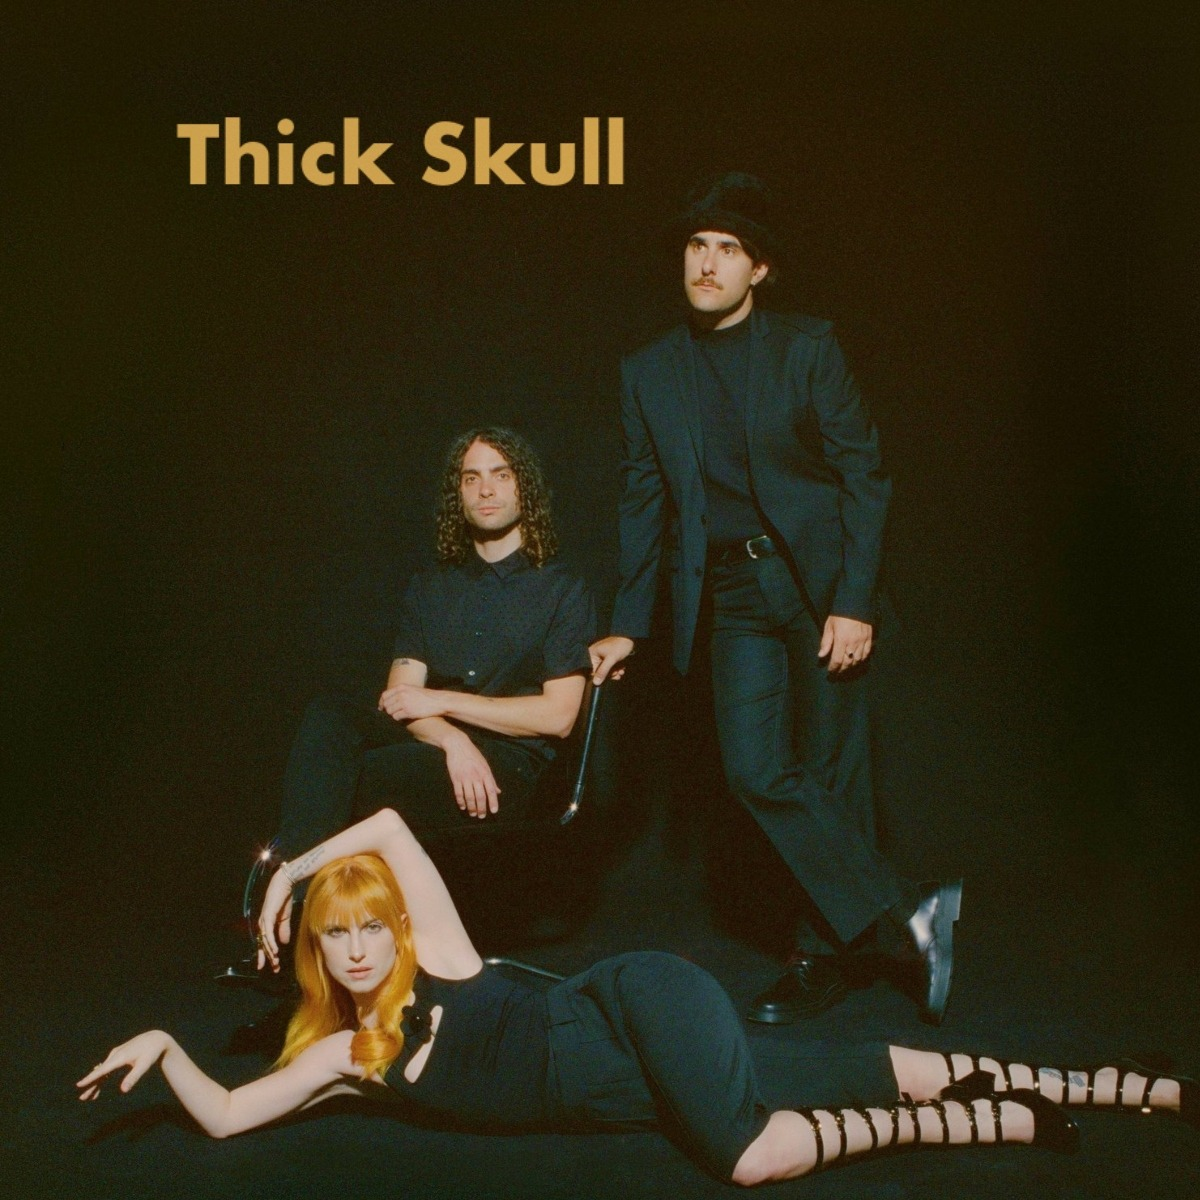

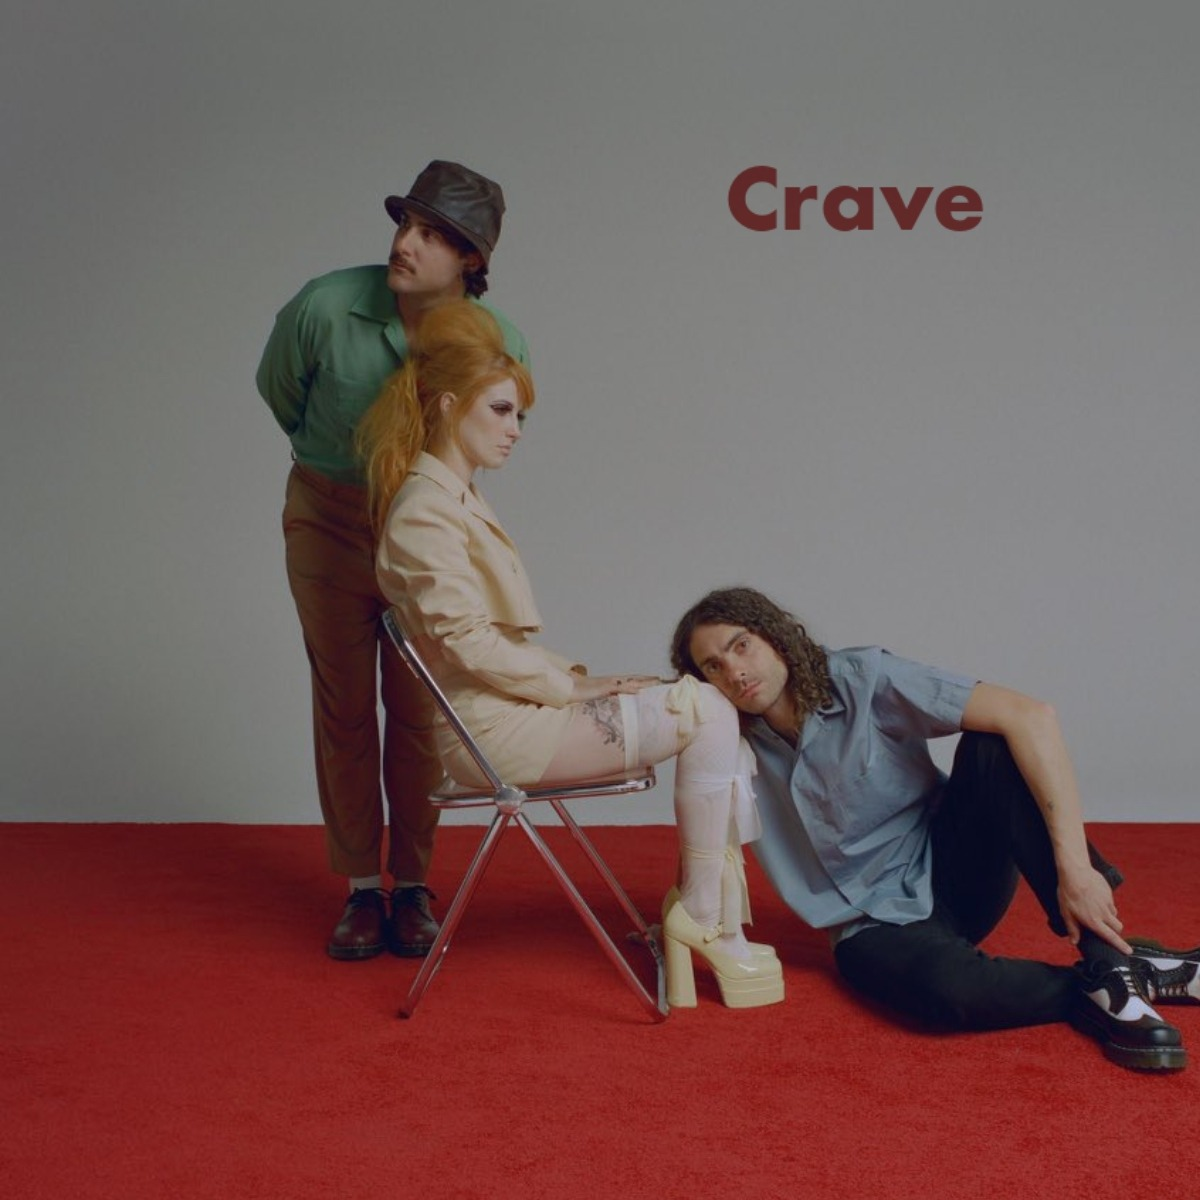

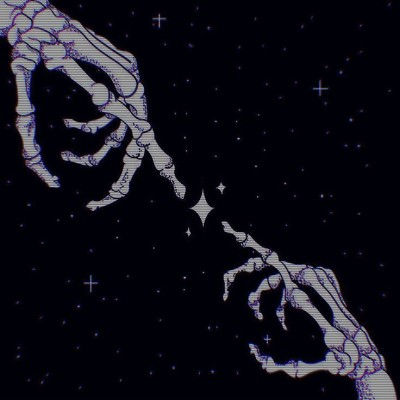

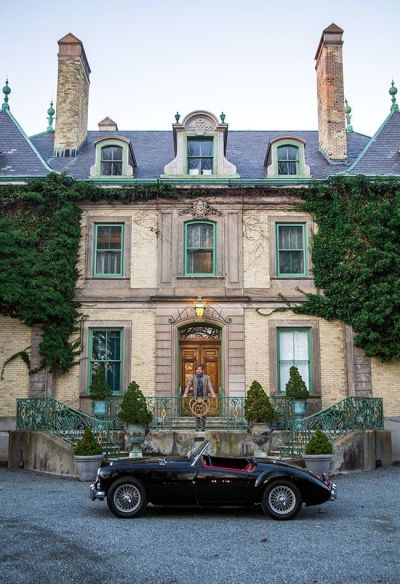

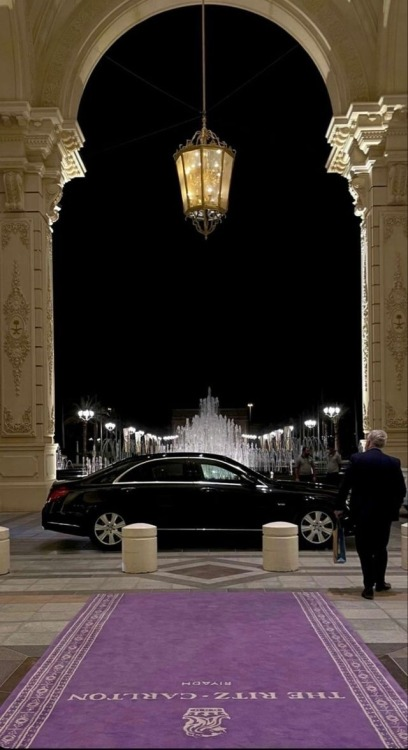

In [29]:
#Get the closest 5 pictures that relate to the query.
closest = np.argsort(similarity, )[-5:]
results = dataset.iloc[closest].values

for item in results:
    # Code adapted from https://www.geeksforgeeks.org/how-to-open-an-image-from-the-url-in-pil/
    urllib.request.urlretrieve(item[0],"img.png")
    im = Image.open("img.png")
    display(im)
    #im.show()

The following prompts were tried in the code above:

- pink cute spike rebel
- purple luxury music school
- natural academy youth band
- musical destroy black cyber

The code successful displayed related images according to the prompts but some results were unexpected. The third prompt mostly picked from grunge images whereas the fourth prompt produced images of black women (I was expecting black to relate to colour and not race but it could be due to the fact that 'black' was a hashtag used on photos featuring black women in the Old Money aesthetic). The first and second prompts gave expected results.

#### PERFORM LDiA ON ENTIRE DATASET

Since LSA was successful, let us use LDiA and see if we can get a different selection of topics.

In [30]:
## The following code is adapted from NLP Week 2.2- Task Notebook

#LDiA will require the dataset's Bag Of Words, not TFIDF
count_vectoriser = CountVectorizer(tokenizer=hashtag_tokeniser)
bag_of_words_4LDA = count_vectoriser.fit_transform(dataset["Descriptions and hashtag"])
vocab_4LDA = count_vectoriser.get_feature_names_out()

print(bag_of_words_4LDA.todense().shape)

(500, 1749)


In [31]:
lda = LatentDirichletAllocation(n_components=num_topics,
                                random_state=123,
                                learning_method='batch')

lda_topics_whole = lda.fit_transform(bag_of_words_4LDA)

In [32]:
#How much does each picture apply to each review?
lda_topic_vectors_df = pd.DataFrame(lda_topics_whole, index=dataset["Photo URL"].values, columns=labels)
lda_topic_vectors_df.sample(10)

topic0    topic1  \
https://64.media.tumblr.com/0eee0fd5e4146f45f08...  0.003704  0.003705   
https://64.media.tumblr.com/a7aea6cb15eb294df42...  0.001563  0.985937   
https://64.media.tumblr.com/3931db32b48681f37ec...  0.009091  0.009091   
https://64.media.tumblr.com/4872972e4b474b62b73...  0.002778  0.974999   
https://64.media.tumblr.com/c3785ee6a2c5372b042...  0.002778  0.002778   
https://64.media.tumblr.com/ec0e818fd9b36100bc7...  0.002778  0.974999   
https://64.media.tumblr.com/796b36fc72873ba4a3b...  0.251955  0.010000   
https://64.media.tumblr.com/a95ab3cc4b3c5c1df04...  0.002778  0.002778   
https://64.media.tumblr.com/95716c1f0f52c710169...  0.002857  0.926008   
https://64.media.tumblr.com/981aeebf7a61c7076a3...  0.002174  0.208007   

                                                      topic2    topic3  \
https://64.media.tumblr.com/0eee0fd5e4146f45f08...  0.003704  0.003704   
https://64.media.tumblr.com/a7aea6cb15eb294df42...  0.001563  0.001563   
https://64.media.tumblr.com/3931db32b48681f37ec...  0.497882  0.009091   
https://64.media.tumblr.com/4872972e4b474b62b73...  0.002778  0.002778   
https://64.media.tumblr.com/c3785ee6a2c5372b042...  0.002778  0.002778   
https://64.media.tumblr.com/ec0e818fd9b36100bc7...  0.002778  0.002778   
https://64.media.tumblr.com/796b36fc72873ba4a3b...  0.010007  0.010002   
https://64.media.tumblr.com/a95ab3cc4b3c5c1df04...  0.002778  0.002778   
https://64.media.tumblr.com/95716c1f0f52c710169...  0.002858  0.002857   
https://64.media.tumblr.com/981aeebf7a61c7076a3...  0.649062  0.002174   

                                                      topic4    topic5  \
https://64.media.tumblr.com/0eee0fd5e4146f45f08...  0.003704  0.966665   
https://64.media.tumblr.com/a7aea6cb15eb294df42...  0.001563  0.001563   
https://64.media.tumblr.com/3931db32b48681f37ec...  0.009093  0.429386   
https://64.media.tumblr.com/4872972e4b474b62b73...  0.002778  0.002778   
https://64.media.tumblr.com/c3785ee6a2c5372b042...  0.002778  0.002781   
https://64.media.tumblr.com/ec0e818fd9b36100bc7...  0.002778  0.002778   
https://64.media.tumblr.com/796b36fc72873ba4a3b...  0.010001  0.668033   
https://64.media.tumblr.com/a95ab3cc4b3c5c1df04...  0.974997  0.002778   
https://64.media.tumblr.com/95716c1f0f52c710169...  0.002857  0.051133   
https://64.media.tumblr.com/981aeebf7a61c7076a3...  0.002174  0.127712   

                                                      topic6    topic7  \
https://64.media.tumblr.com/0eee0fd5e4146f45f08...  0.003704  0.003704   
https://64.media.tumblr.com/a7aea6cb15eb294df42...  0.001563  0.001563   
https://64.media.tumblr.com/3931db32b48681f37ec...  0.009091  0.009091   
https://64.media.tumblr.com/4872972e4b474b62b73...  0.002778  0.002778   
https://64.media.tumblr.com/c3785ee6a2c5372b042...  0.002778  0.974994   
https://64.media.tumblr.com/ec0e818fd9b36100bc7...  0.002778  0.002778   
https://64.media.tumblr.com/796b36fc72873ba4a3b...  0.010000  0.010001   
https://64.media.tumblr.com/a95ab3cc4b3c5c1df04...  0.002778  0.002778   
https://64.media.tumblr.com/95716c1f0f52c710169...  0.002857  0.002858   
https://64.media.tumblr.com/981aeebf7a61c7076a3...  0.002174  0.002174   

                                                      topic8    topic9  
https://64.media.tumblr.com/0eee0fd5e4146f45f08...  0.003704  0.003704  
https://64.media.tumblr.com/a7aea6cb15eb294df42...  0.001563  0.001563  
https://64.media.tumblr.com/3931db32b48681f37ec...  0.009091  0.009091  
https://64.media.tumblr.com/4872972e4b474b62b73...  0.002778  0.002778  
https://64.media.tumblr.com/c3785ee6a2c5372b042...  0.002778  0.002778  
https://64.media.tumblr.com/ec0e818fd9b36100bc7...  0.002778  0.002778  
https://64.media.tumblr.com/796b36fc72873ba4a3b...  0.010000  0.010000  
https://64.media.tumblr.com/a95ab3cc4b3c5c1df04...  0.002778  0.002778  
https://64.media.tumblr.com/95716c1f0f52c710169...  0.002857  0.002857  
https://64.media.tumblr.com/981aeebf7a61c7076a3...  0.002174  0.

In [33]:
#Most relevant words for each topic from LDiA
for i, topic in enumerate(lda.components_):
    print("topic " + str(i) + ":")
    #Get last n tokens (highest values)
    print(vocab_4LDA[topic.argsort()[-num_terms:]])

topic 0:
['item' 'rail' 'way' '2000s' 'pink' 'punk' 'johnny' 'ryan' 'cky'
 'knoxville' 'skate' 'aesthetic' 'dunn' 'margera' 'jackass' 'y2k' '' 'bam'
 'skater' 'girl']
topic 1:
['rich' 'aka' 'moodboard' 'girlblogging' 'ray' 'dollete' 'dollette'
 'lizzy' 'soft' '' 'pink' 'grant' 'rey' 'money' 'old' 'del' 'girl'
 'coquette' 'lana' 'aesthetic']
topic 2:
['academia' 'pink' 'fairycore' 'transparent' 'png' 'core' 'kawaii'
 'nostalgiacore' 'naturecore' 'dark' 'nature' 'cute' 'nostalgia' 'kidcore'
 '2000s' 'y2k' 'art' 'cottagecore' '' 'aesthetic']
topic 3:
['paramore' 'magazine' 'monkey' 'pale' 'sfw' 'kidcore' 'revival' 'kerrang'
 'blog' 'soft' 'agere' 'nostalgia' 'plush' 'anime' 'emo' '' 'aesthetic'
 'tumblr' '2014' 'grunge']
topic 4:
['fall' 'japan' 'cottage' 'gothic' 'harajuku' 'icon' 'skater' 'mall'
 'retro' 'princess' 'style' 'punk' 'y2k' 'vintage' 'goth' '' 'grunge'
 'aesthetic' 'fashion' '90']
topic 5:
['carrd' 'blue' 'poetry' '90' 'acadamia' 'art' 'pink' 'quote' 'moodboard'
 'cyber' 'li